## AQI EDA and Data Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import io

df = pd.read_csv('cleaned_air_quality.csv')


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7877 entries, 0 to 7876
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_local           7877 non-null   object 
 1   observation_count    7877 non-null   int64  
 2   observation_percent  7877 non-null   float64
 3   validity_indicator   7877 non-null   object 
 4   pollutant_mean       7877 non-null   float64
 5   first_max_value      7877 non-null   float64
 6   aqi                  7877 non-null   float64
 7   local_site_name      7651 non-null   object 
 8   state                7877 non-null   object 
 9   county               7877 non-null   object 
 10  city                 7877 non-null   object 
 11  cbsa                 7466 non-null   object 
 12  month                7877 non-null   int64  
 13  week                 7877 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 861.7+ KB
None


In [4]:
print(df.head())

   date_local  observation_count  observation_percent validity_indicator  \
0  2024-01-01                  1                100.0                  Y   
1  2024-01-02                  1                100.0                  Y   
2  2024-01-03                  1                100.0                  Y   
3  2024-01-04                  1                100.0                  Y   
4  2024-01-05                  1                100.0                  Y   

   pollutant_mean  first_max_value   aqi        local_site_name       state  \
0            20.0             20.0  71.0  Seattle-10th & Weller  Washington   
1            14.8             14.8  62.0  Seattle-10th & Weller  Washington   
2             4.9              4.9  27.0  Seattle-10th & Weller  Washington   
3             3.6              3.6  20.0  Seattle-10th & Weller  Washington   
4             4.6              4.6  26.0  Seattle-10th & Weller  Washington   

  county     city                         cbsa  month  week  
0   Ki

In [5]:
# Dataset summary 
print(df.describe())

       observation_count  observation_percent  pollutant_mean  \
count             7877.0               7877.0     7877.000000   
mean                 1.0                100.0        5.881884   
std                  0.0                  0.0        4.497502   
min                  1.0                100.0       -1.700000   
25%                  1.0                100.0        3.100000   
50%                  1.0                100.0        4.800000   
75%                  1.0                100.0        7.300000   
max                  1.0                100.0       76.900000   

       first_max_value          aqi        month         week  
count      7877.000000  7877.000000  7877.000000  7877.000000  
mean          5.881884    30.063095     6.623588    26.833947  
std           4.497502    17.099519     3.476741    15.212624  
min          -1.700000     0.000000     1.000000     1.000000  
25%           3.100000    17.000000     4.000000    14.000000  
50%           4.800000    27.0

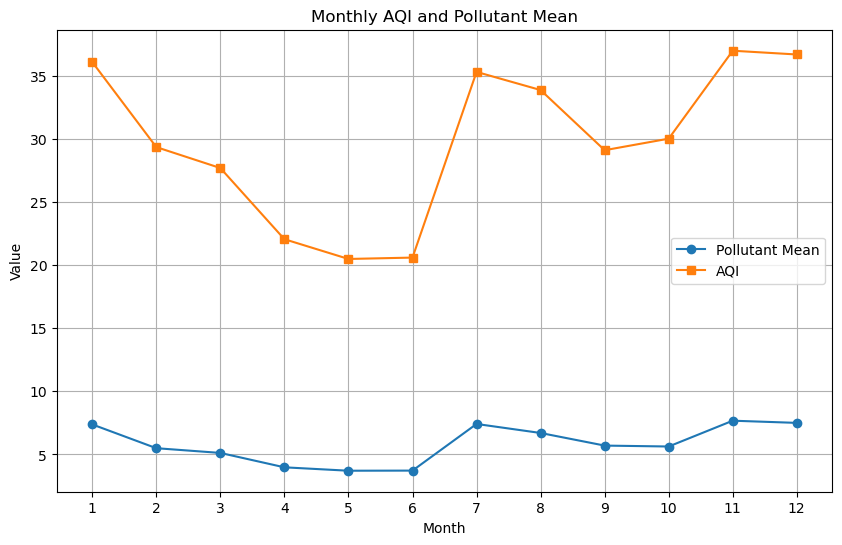

In [6]:
# monthly aqi and  pollutant mean
monthly_avg = df.groupby('month')[['pollutant_mean', 'aqi']].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['month'], monthly_avg['pollutant_mean'], label='Pollutant Mean', marker='o')
plt.plot(monthly_avg['month'], monthly_avg['aqi'], label='AQI', marker='s')
plt.title('Monthly AQI and Pollutant Mean')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

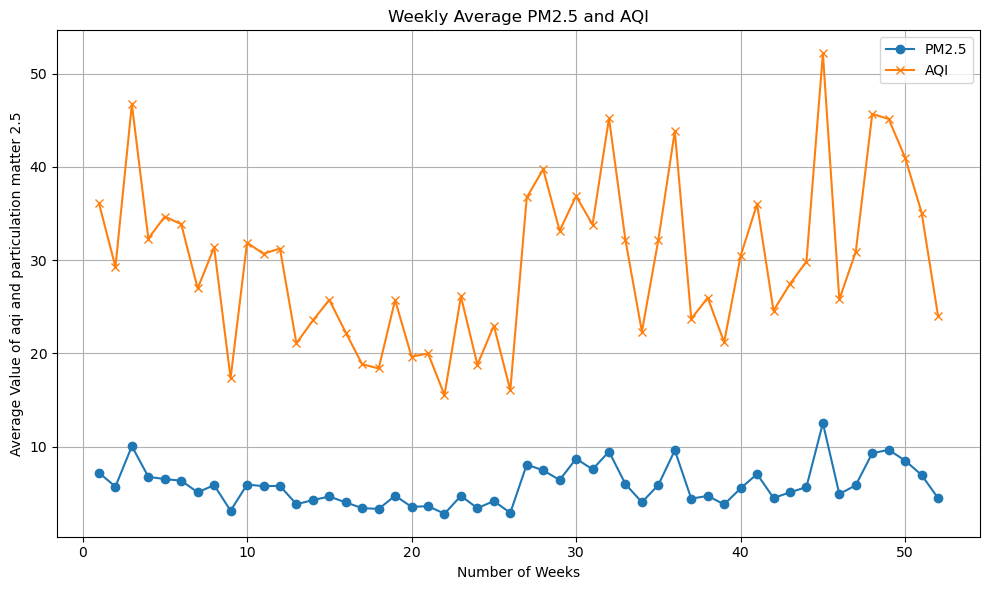

In [7]:
# Time series weekly trend for pm2.5 pollutant and aqi in 2024
avg = df.groupby('week')[['pollutant_mean', 'aqi']].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg['week'], avg['pollutant_mean'], label='PM2.5', marker='o')
plt.plot(avg['week'], avg['aqi'], label='AQI', marker='x')
plt.xlabel('Number of Weeks')
plt.ylabel('Average Value of aqi and particulation matter 2.5')
plt.title('Weekly Average PM2.5 and AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Top 5 Cities with higher AQI ):
             city        aqi
0     Marysville  39.528249
1        Tukwila  35.813218
2      Toppenish  35.794444
3  Not in a city  33.915594
4         Yakima  33.833333

Top 5 Cities with lower AQI):
                  city        aqi
0           Bremerton  21.509972
1  Nespelem Community  22.178082
2          Darrington  23.101408
3           Vancouver  23.368715
4           Anacortes  24.075209


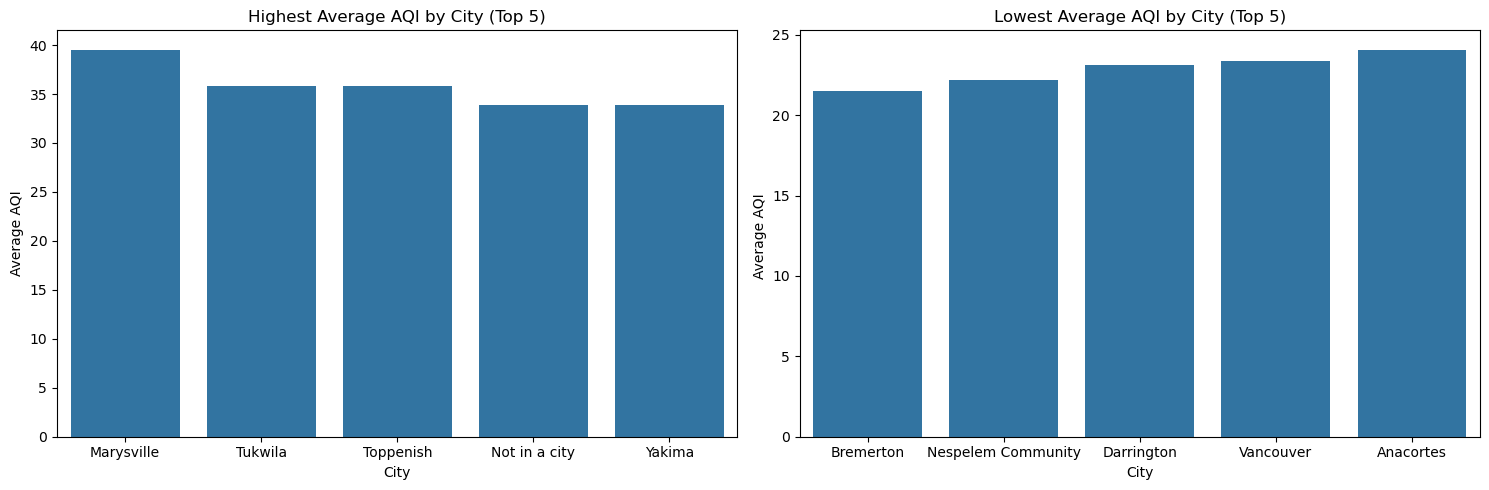

In [8]:
# Average AQI of cities
city_with_high_aqi = df.groupby('city')['aqi'].mean().sort_values(ascending=False).reset_index()
city_with_low_aqi = df.groupby('city')['aqi'].mean().sort_values(ascending=True).reset_index()
print("\nTop 5 Cities with higher AQI ):\n", (city_with_high_aqi.head()))
print("\nTop 5 Cities with lower AQI):\n",(city_with_low_aqi.head()))

# High aqi average plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='city', y='aqi', data=city_with_high_aqi.head(5))
plt.title('Highest Average AQI by City (Top 5)')
plt.xlabel('City')
plt.ylabel('Average AQI')


# low aqi average plot
plt.subplot(1, 2, 2)
sns.barplot(x='city', y='aqi', data=city_with_low_aqi.head(5))
plt.title('Lowest Average AQI by City (Top 5)')
plt.xlabel('City')
plt.ylabel('Average AQI ')
plt.tight_layout()
plt.show()


Average AQI of Counties:
      county        aqi
0  Okanogan  35.844282
1    Yakima  34.196078
2   Stevens  33.713092
3      King  31.510570
4   Whatcom  30.873239

Average AQI of Counties:
      county        aqi
0    Kitsap  21.509972
1     Clark  23.368715
2    Skagit  24.075209
3  Kittitas  24.889197
4    Pierce  29.152435


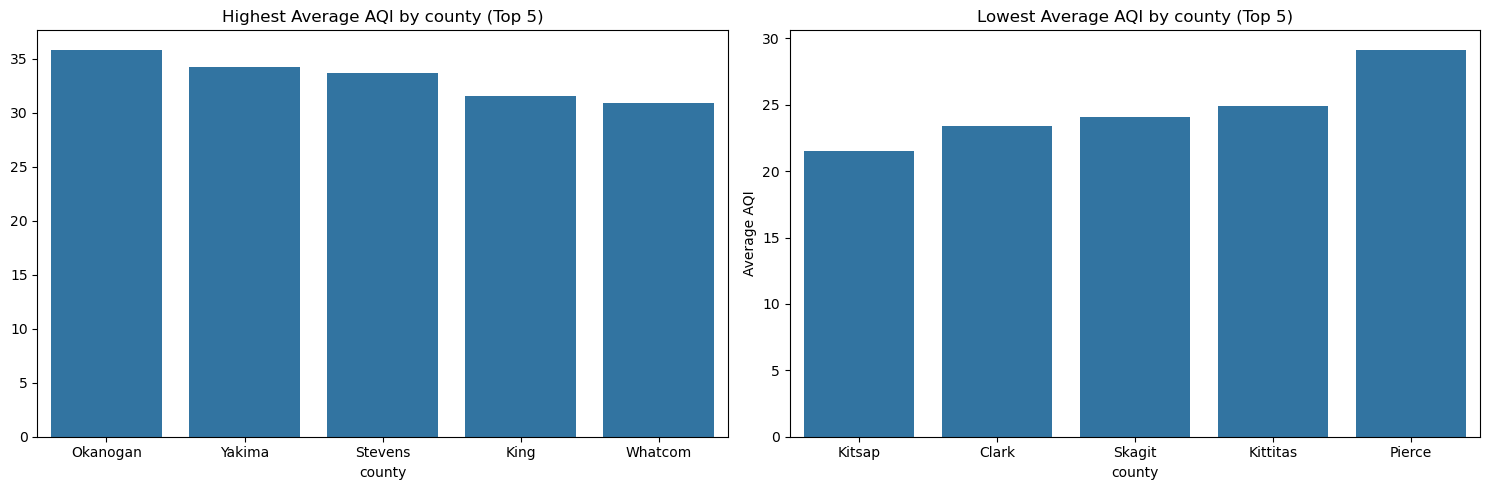

In [10]:
# Average AQI of Counties
county_with_high_aqi = df.groupby('county')['aqi'].mean().sort_values(ascending=False).reset_index()
print("\nAverage AQI of Counties:\n", county_with_high_aqi.sort_values('aqi', ascending=False).head())

county_with_low_aqi = df.groupby('county')['aqi'].mean().sort_values(ascending=True).reset_index()
print("\nAverage AQI of Counties:\n", county_with_low_aqi.sort_values('aqi', ascending=True).head())

# High aqi average plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='county', y='aqi', data=county_with_high_aqi.head())
plt.title('Highest Average AQI by county (Top 5)')
plt.xlabel('county')
plt.ylabel('')


# low aqi average plot
plt.subplot(1, 2, 2)
sns.barplot(x='county', y='aqi', data=county_with_low_aqi.head())
plt.title('Lowest Average AQI by county (Top 5)')
plt.xlabel('county')
plt.ylabel('Average AQI')
plt.tight_layout()
plt.show()

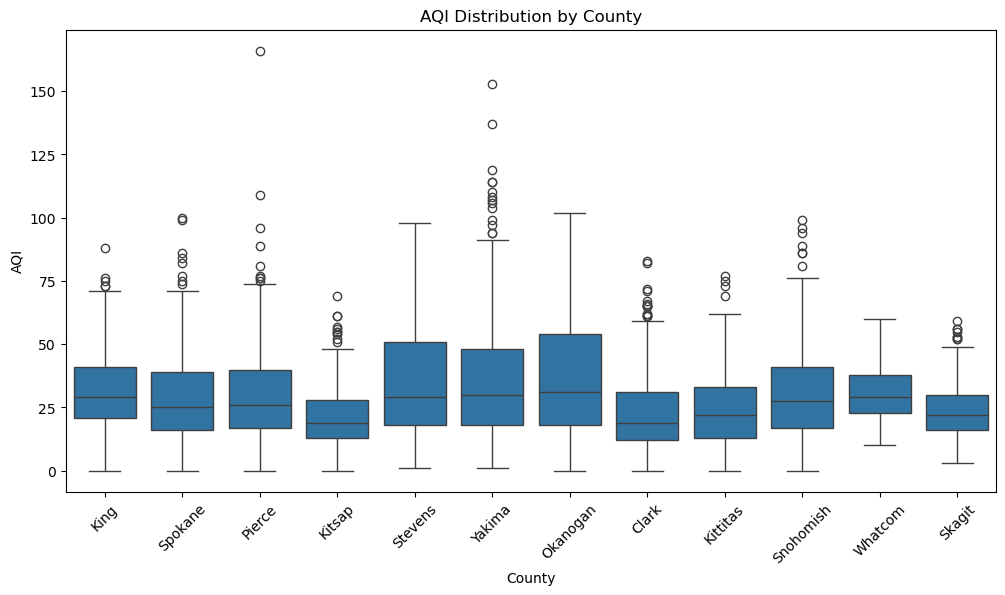

In [11]:
# Box plot of AQI by county
plt.figure(figsize=(12, 6))
sns.boxplot(x='county', y='aqi', data=df)
plt.title('AQI Distribution by County')
plt.xlabel('County')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()

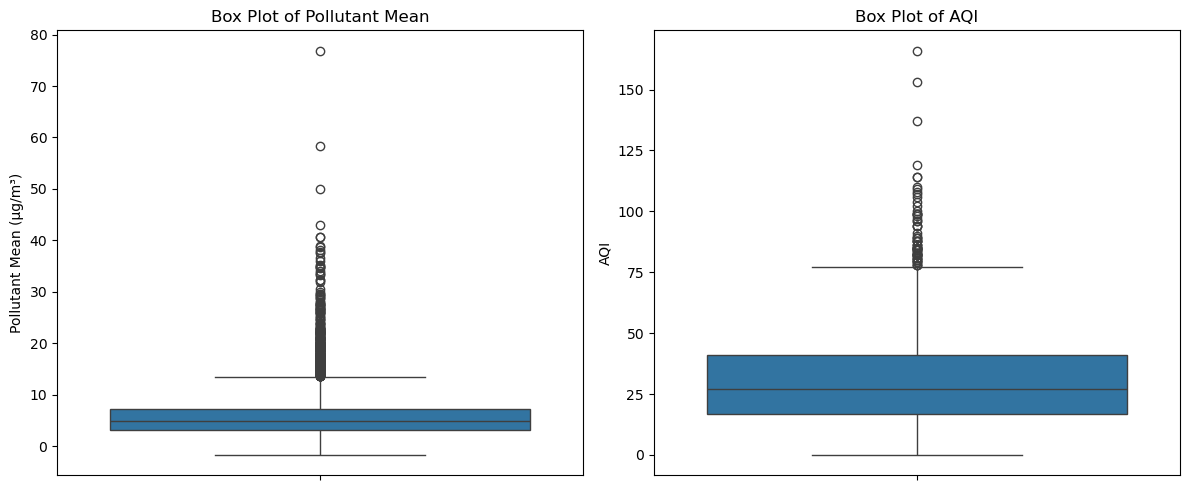

In [12]:
# 7. Box plotting on aqi and pollutant 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['pollutant_mean'])
plt.title('Box Plot of Pollutant Mean')
plt.ylabel('Pollutant Mean (µg/m³)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['aqi'])
plt.title('Box Plot of AQI')
plt.ylabel('AQI')
plt.tight_layout()
plt.show()

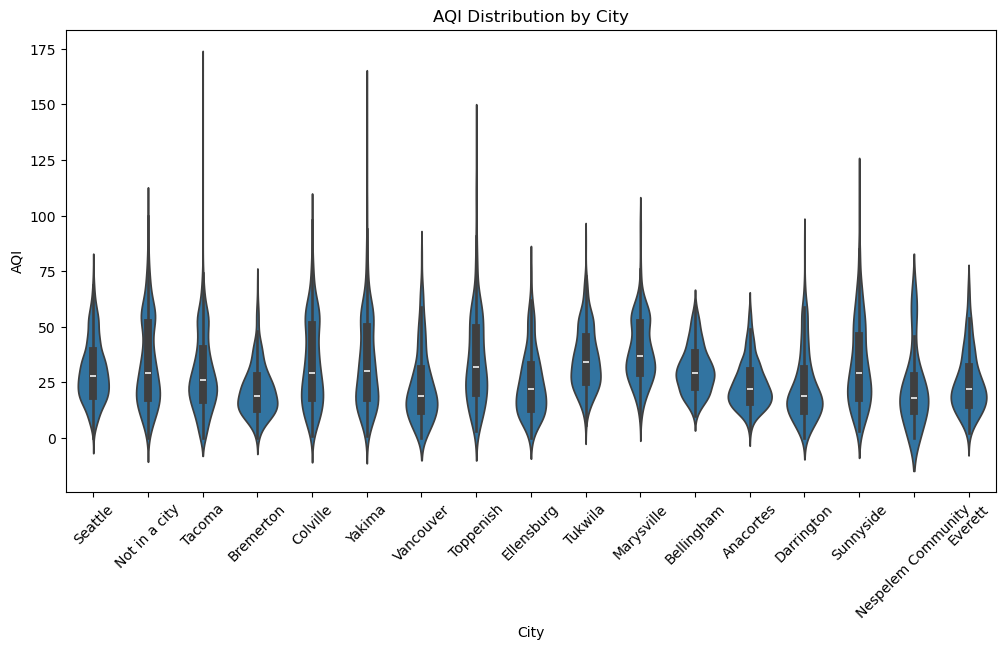

In [13]:
# 2. Location-Based AQI Comparison
plt.figure(figsize=(12, 6))
sns.violinplot(x='city', y='aqi', data=df)
plt.title('AQI Distribution by City')
plt.xlabel('City')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()

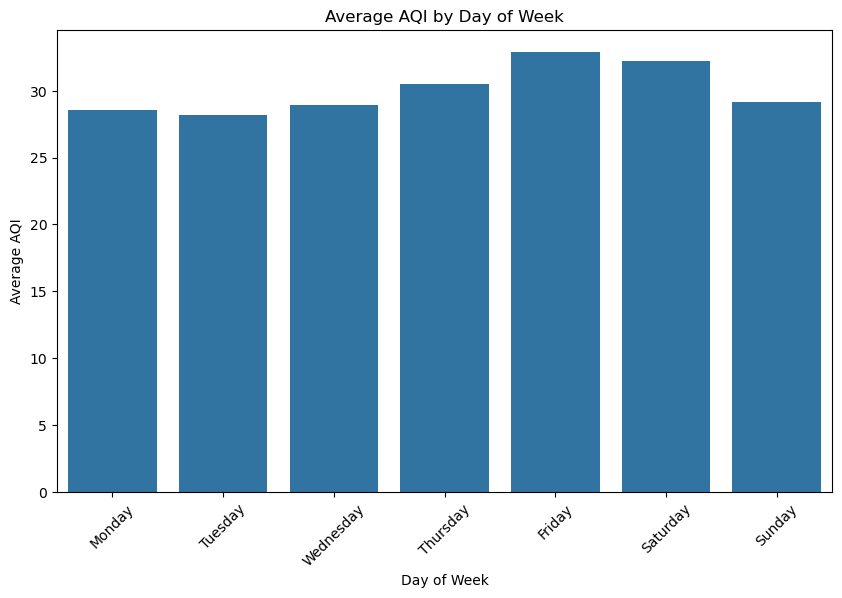

In [14]:
# 4. daily AQI Analysis
df['date_local'] = pd.to_datetime(df['date_local'], errors='coerce')
df['day_of_week'] = df['date_local'].dt.day_name()

daily_aqi = df.groupby('day_of_week')['aqi'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_aqi.index, y=daily_aqi.values)
plt.title('Average AQI by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Model Training

In [16]:

# Selecting features and target variable for model
features = ['pollutant_mean', 'first_max_value']
X = df[features]
y = df['aqi']

# Spliting the data to train models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Linear Regression

In [18]:
# Implementing Linear Regression Model
lin_rg_model = LinearRegression()
lin_rg_model.fit(X_train_scaled, y_train)

# Making Predictions
y_pred_lin_rg = lin_rg_model.predict(X_test_scaled)


In [19]:
# Evaluating to get results
mae_lin_rg = mean_absolute_error(y_test, y_pred_lin_rg)
mse_lin_rg = mean_squared_error(y_test, y_pred_lin_rg)
rmse_lin_rg = np.sqrt(mse_lin_rg)
r2_lin_rg = r2_score(y_test, y_pred_lin_rg)

In [20]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lin_rg_model, X, y, cv=5, scoring='r2')
print(f"R² Cross-Validation: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

R² Cross-Validation: 0.897 ± 0.015


In [21]:
print("Results:")
print(f"Mean Absolute Error- MAE: {mae_lin_rg:.2f}")
print(f"Mean Squared Error- MSE: {mse_lin_rg:.2f}")
print(f"Root Mean Squared Error- RMSE: {rmse_lin_rg:.2f}")
print(f"R² Score: {r2_lin_rg:.4f}")

Results:
Mean Absolute Error- MAE: 3.82
Mean Squared Error- MSE: 26.72
Root Mean Squared Error- RMSE: 5.17
R² Score: 0.9062


#### Random Forest

In [22]:
# Implementing Random Forest Model
ra_fo_model = RandomForestRegressor(n_estimators=100, random_state=42)
ra_fo_model.fit(X_train_scaled, y_train)

# Making Predictions
y_pred_ra_fo = ra_fo_model.predict(X_test_scaled)

In [23]:
# Evaluating to get results
mae_ra_fo = mean_absolute_error(y_test, y_pred_ra_fo)
mse_ra_fo = mean_squared_error(y_test, y_pred_ra_fo)
rmse_ra_fo = np.sqrt(mse_ra_fo)
r2_ra_fo = r2_score(y_test, y_pred_ra_fo)


In [24]:
print("Results:")
print(f"Mean Absolute Error- MAE: {mae_ra_fo:.2f}")
print(f"Mean Squared Error- MSE: {mse_ra_fo:.2f}")
print(f"Root Mean Squared Error- RMSE: {rmse_ra_fo:.2f}")
print(f"R² Score: {r2_ra_fo:.4f}")

Results:
Mean Absolute Error- MAE: 0.02
Mean Squared Error- MSE: 0.34
Root Mean Squared Error- RMSE: 0.58
R² Score: 0.9988


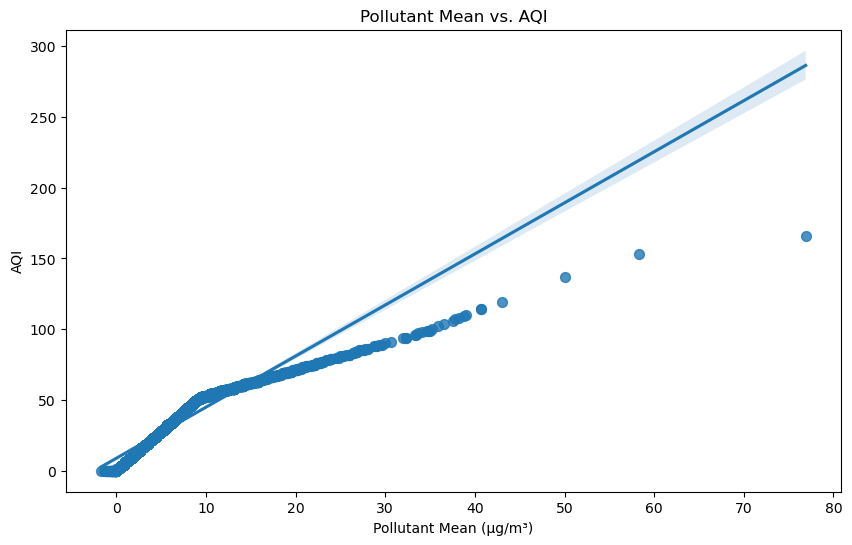

Correlation in AQI and Pullutant Mean: 0.9495


In [25]:
# 3. Scatter Plot of Pollutant Mean vs. AQI 
plt.figure(figsize=(10, 6))
sns.regplot(x='pollutant_mean', y='aqi', data=df, scatter_kws={'s': 50})
plt.title('Pollutant Mean vs. AQI')
plt.xlabel('Pollutant Mean (µg/m³)')
plt.ylabel('AQI')
plt.show()

correlation = df['pollutant_mean'].corr(df['aqi'])
print(f"Correlation in AQI and Pullutant Mean: {correlation:.4f}")